<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Lecture-5_February-3-2026/Assignment-2_FirstSteps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chemical Applications of Machine Learning (CHEM 4930/5610) - Spring 2026

### Assignment 2 - Deadline 2/3/2026
Points 10

#### General Comments
All figures and graph should have approriate labels on the two axis, and should include a legend with appropriate labels of the different plots.

The notebook should be return in working format. That is, I should be able to reset all the output and re-run all the cells and get the same results as you obtained.

**You should start by saving a copy of the notebook to your Google Drive so you preserve all changes.**

**Please add your name as a suffix to the filname**

**Student Name**: Add your name here

**AI usage statement:**
Here you should give a statement about any usage of AI tools to assist you with the coding.

### Task 1 - 10 points

In this task, we will consider the Bradley Melting Point Dataset, which is curated chemical dataset with melting points of around 3,000 chemical compounds, see [here](https://www.kaggle.com/datasets/aliffaagnur/melting-point-chemical-dataset/data).

This dataset is stored in a comma-separated values (csv) file, which is common format used to start data in text files. We can load this into a pandas DataFrame using the `load_csv` function.

In this dataset, we have the compounds names, SMILES strings, and the melting point in Celsius.

#### A)
Identify in the dataset the chemical compounds with the 5 lowest melting points and 5 highest melting points and visualize their 2D chemical structure using RDKit and the [mols2grid package](https://mols2grid.readthedocs.io/en/latest/), where you display the melting point values on the grid, see [here](https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/A_Whirlwind_Introduction_To_The_RDKit.ipynb#scrollTo=N3CR7rMF3sg7) for an example of the usage of mols2grid.

#### B)
Calculate the following properties for the molecules using RDKIt:
- The molecular weight
- The number of heavy atoms
- Number of hydrogen bond acceptors
- Number of hydrogen bond donors
- [Octanol-water partition coefficient - LogP](https://pubs-acs-org.libproxy.library.unt.edu/doi/10.1021/ci990307l)
- [Topological polar surface area (TPSA) descriptor](https://pubs-acs-org.libproxy.library.unt.edu/doi/abs/10.1021/jm000942e)
- Topological polar surface area (TPSA) descriptor, including S and P atoms, see [here](https://www.rdkit.org/docs/RDKit_Book.html#implementation-of-the-tpsa-descriptor)

Note: for some of the molecules, the TPSA descriptor will give a value of zero. When doing any analysis for the TPSA descriptor, you should ignore these values.

#### C)
Write out to a new csv file values of all the properties calculated in B) along with the compound names, SMILES strings, and the melting point in Celsius. Here, when writing this file, you should ignore any compounds where the SMILES conversion did not work correctly.

#### D)
Perform a linear regression analysis using scikit-learn where you look at the correlation of each of the properties calculated in B) with melting temperature. Here, each property should be considered individually.

To avoid outliers, filter out (i.e., remove) the compounds with the lowest 10% and the highest 10% melting temperature. Make a histogram that shows this filtering. Furthermore, for each property, filter out the compounds with lowest 10% and highest 10% values (again making a histogram that shows this filtering). Only consider the joint remaining compounds in your linear regression analysis for each property.

When performing the linear regression, employ a 70%/30% training/test split.

Calculate the coefficient of determination, $R^2$, for both the training dataset and the test dataset and report both.

You should make figure that shows the data along with the linear curve coming from the linear regression. In the figure, it should be clear which data points are in the training and test set (e.g., by having them in different colors). Include the $R^2$ values on the figure.

From your analysis, which of the properties correlates best with the melting temperature?

#### E)
For two of the properties from D) (e.g., the ones that correlate best with the melting point), perform [RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus) regression, which is method that takes outliers into account when performing linear regression and does not include them in the final modeling, see [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html).

In the figure, it should be clear which data points are in inlier set and which are in the outlier set (e.g., by showing them in different colors).


In [1]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-2/"
dataset_filename="BradleyDoublePlusGoodMeltingPointDataset.csv"

rm -f ${dataset_filename}

wget ${url}/${dataset_filename} &> /dev/null

ls

BradleyDoublePlusGoodMeltingPointDataset.csv
sample_data


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [7]:
# the %%capture command will surpress output to screen
#%%capture
!pip install rdkit mols2grid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.8 MB/s eta 0:00:00


In [8]:
from rdkit import Chem

In [9]:
data_mp = pd.read_csv("BradleyDoublePlusGoodMeltingPointDataset.csv")

In [10]:
data_mp

key                        name  \
0     27956           cyclobutylmethane   
1     16005              Nitrogen oxide   
2     16127         Sulfuryl difluoride   
3     17138                disopyramide   
4     15628                     Bromine   
...     ...                         ...   
3036  27698         4-Nitrobenzoic acid   
3037  28584                 Thalidomide   
3038  28068                   Estradiol   
3039  27580       2,4,6-Trichlorophenol   
3040   1059  2-(trifluoromethyl)aniline   

                                                 smiles     mpC      csid  \
0                                             C1(CCC1)C -161.51     11232   
1                                            [O-][N+]#N  -90.80       923   
2                                           FS(F)(=O)=O -135.80     16647   
3            CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C   94.80      3002   
4                                                  BrBr   -7.20     22817   
...                                                 ...     ...       ...   
3036                    C1=CC(=CC=C1C(=O)O)[N+](=O)[O-]  240.00      5882   
3037             C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O  275.00      5233   
3038  C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...  176.00      5554   
3039                           C1=C(C=C(C(=C1Cl)O)Cl)Cl   65.00  21106172   
3040                              c1ccc(c(c1)C(F)(F)F)N  -34.00      6656   

                                                   link  \
0       http://pubs.acs.org/doi/abs/10.1021/ja01142a048   
1                            http://msds.chem.ox.ac.uk/   
2                            http://msds.chem.ox.ac.uk/   
3                   http://dx.doi.org/10.1021/ci700307p   
4                            http://msds.chem.ox.ac.uk/   
...                                                 ...   
3036  http://dx.doi.org/10.1016/j.chemosphere.2013.1...   
3037  http://dx.doi.org/10.1016/j.chemosphere.2013.1...   
3038  http://dx.doi.org/10.1016/j.chemosphere.2013.1...   
3039  http://dx.doi.org/10.1016/j.chemosphere.2013.1...   
3040     http://www.alfa.com/en/GP100W.pgm?DSSTK=A15072   

                                                 source  count     min    max  \
0     Lemaire HP; Livingston RL Journal of the Ameri...      2 -161.51 -161.5   
1                                      academic website      2  -90.81  -90.8   
2                                      academic website      2 -135.82 -135.8   
3     Hughes LD; Palmer DS; Nigsch F and Mitchell JB...      2   94.75   94.8   
4                                      academic website      2   -7.25   -7.2   
...                                                 ...    ...     ...    ...   
3036  Abraham M.H. and Acree Jr. W.E. The solubility...      6  237.00  242.0   
3037  Abraham M.H. and Acree Jr. W.E. The solubility...      7  270.00  275.0   
3038  Abraham M.H. and Acree Jr. W.E. The solubility...      7  173.00  178.0   
3039  Abraham M.H. and Acree Jr. W.E. The solubility...      9   65.00   70.0   
3040                                         Alfa Aesar      3  -34.00  -29.0   

      range  
0      0.01  
1      0.01  
2      0.02  
3      0.05  
4      0.05  
...     ...  
3036   5.00  
3037   5.00  
3038   5.00  
3039   5.00  
3040   5.00  

[3041 rows x 11 columns]

In [11]:
print(list(data_mp.keys()))

['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count', 'min', 'max', 'range']


In [13]:
melting_point_C = data_mp['mpC']
print(melting_point_C)

0      -161.51
1       -90.80
2      -135.80
3        94.80
4        -7.20
         ...  
3036    240.00
3037    275.00
3038    176.00
3039     65.00
3040    -34.00
Name: mpC, Length: 3041, dtype: float64


In [15]:
indices_5_lowest = np.argpartition(melting_point_C,5)[:5]
print(indices_5_lowest)

[375 102 303 345 821]


In [24]:
data_mp.describe()

key          mpC          csid        count          min  \
count   3041.000000  3041.000000  3.041000e+03  3041.000000  3041.000000   
mean   10771.570865    62.848159  2.027796e+06     2.798422    62.229536   
std     6875.518120    96.007422  5.474893e+06     1.275456    95.877685   
min       10.000000  -188.000000  1.800000e+01     2.000000  -188.000000   
25%     5148.000000     5.000000  7.634000e+03     2.000000     4.800000   
50%    13103.000000    64.000000  1.282900e+04     2.000000    62.750000   
75%    15269.000000   129.500000  6.675900e+04     3.000000   129.000000   
max    28644.000000   438.000000  2.142902e+07    16.000000   437.300000   

               max        range  
count  3041.000000  3041.000000  
mean     63.879092     1.649556  
std      96.229485     1.293567  
min    -187.600000     0.010000  
25%       5.600000     0.500000  
50%      65.000000     1.000000  
75%     130.800000     2.500000  
max     440.000000     5.000000

In [66]:
# here we use the .iloc to only show the specifc 5 lowest mpC
data_mp[['name', 'smiles', 'mpC']].iloc[indices_5_lowest]

name     smiles     mpC
375             Propane        CCC -188.00
102          Prop-1-ene       C=CC -185.00
303           But-1-ene      C=CCC -185.00
345  Tetrafluoromethane  FC(F)(F)F -184.00
821              ethane         CC -183.33

In [25]:
data_mp['name'][indices_5_lowest]


375               Propane
102            Prop-1-ene
303             But-1-ene
345    Tetrafluoromethane
821                ethane
Name: name, dtype: object

In [26]:
data_mp['mpC'][indices_5_lowest]

375   -188.00
102   -185.00
303   -185.00
345   -184.00
821   -183.33
Name: mpC, dtype: float64

In [55]:
indices_5_highest = np.argpartition(melting_point_C,-5)[-5:]
print(indices_5_highest)

[2639 2952  482 1075 2384]


name  \
2639                        Diazoxide   
2952                 isophthalic_acid   
482            2,4-dihydroxypteridine   
1075  thiophene-2,5-dicarboxylic acid   
2384                         Coronene   

                                                 smiles    mpC  
2639                       Clc1ccc2NC(C)=NS(=O)(=O)c2c1  330.5  
2952                             OC(=O)c1cccc(c1)C(=O)O  342.0  
482                      c1cnc2c(n1)c(=O)[nH]c(=O)[nH]2  348.0  
1075                              c1cc(sc1C(=O)O)C(=O)O  358.0  
2384  C1=CC2=C3C4=C1C=CC5=C4C6=C(C=C5)C=CC7=C6C3=C(C...  438.0

In [65]:
# here we use the .iloc to only show the specifc 5 highest mpC
data_mp[['name', 'smiles', 'mpC']].iloc[indices_5_highest]

name  \
2639                        Diazoxide   
2952                 isophthalic_acid   
482            2,4-dihydroxypteridine   
1075  thiophene-2,5-dicarboxylic acid   
2384                         Coronene   

                                                 smiles    mpC  
2639                       Clc1ccc2NC(C)=NS(=O)(=O)c2c1  330.5  
2952                             OC(=O)c1cccc(c1)C(=O)O  342.0  
482                      c1cnc2c(n1)c(=O)[nH]c(=O)[nH]2  348.0  
1075                              c1cc(sc1C(=O)O)C(=O)O  358.0  
2384  C1=CC2=C3C4=C1C=CC5=C4C6=C(C=C5)C=CC7=C6C3=C(C...  438.0

In [32]:
data_mp['mpC'][indices_5_highest]

2639    330.5
2952    342.0
482     348.0
1075    358.0
2384    438.0
Name: mpC, dtype: float64

In [33]:
mols_5_lowest = [Chem.MolFromSmiles(smi) for smi in data_mp['smiles'][indices_5_lowest]]

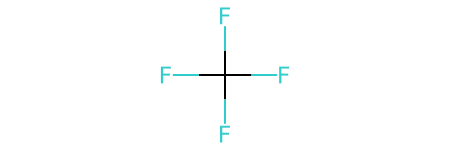

In [36]:
mols_5_lowest[3]

In [37]:
import mols2grid


In [38]:
mols2grid.display(mols_5_lowest)

In [39]:
from rdkit.Chem import Draw #RDKit drawing

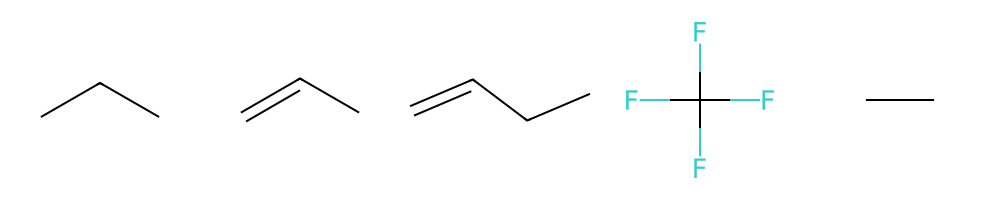

In [41]:
Draw.MolsToGridImage(mols_5_lowest,molsPerRow=5,useSVG=True)

In [44]:
mols_5_highest = [Chem.MolFromSmiles(smi) for smi in data_mp['smiles'][indices_5_highest]]

In [58]:

mols2grid.display(mols_5_highest)

In [63]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
mols2grid.display(data_mp,smiles_col='smiles')

In [67]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
mols2grid.display(data_mp,smiles_col='smiles',subset=['img','name','smiles','mpC'])

In [70]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
mols2grid.display(data_mp.iloc[indices_5_highest],smiles_col='smiles',subset=['img','name','mpC'])

In [71]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
mols2grid.display(data_mp.iloc[indices_5_lowest],smiles_col='smiles',subset=['img','name','mpC'])

In [75]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
# Here we also format the string for the melting point to show the C.

def mp_str(x):
    return f'{x:.2f} C'

mols2grid.display(data_mp.iloc[indices_5_highest],smiles_col='smiles',subset=['img','name','mpC'], transform={"mpC": mp_str})

In [84]:
from rdkit.Chem import Descriptors

def number_of_rotatable_bonds(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.NumRotatableBonds(mol)
  else:
    return np.nan

def molecular_weight(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.MolWt(mol)
  else:
    return np.nan


In [85]:
# here we calculate some property and add that to the dataframe
data_mp['NumRotatableBond'] = [number_of_rotatable_bonds(smi) for smi in data_mp['smiles']]
data_mp['MW'] = [molecular_weight(smi) for smi in data_mp['smiles']]

[19:23:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 31 32 33 34
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12 13 14 15 16
[19:23:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[19:23:55] Can't kekulize mol.  Unkekuliz

In [89]:
def mp_str(x):
    return f'{x:.2f} C'

def mw_str(x):
    return f'{x:.2f} Da'

def number_of_rotatable_bonds_str(x):
    return f'Rotatable bonds: {x:.0f}'

mols2grid.display(data_mp,smiles_col='smiles',
                  subset=['img','name','MW','NumRotatableBond','mpC'],
                  transform={'mpC': mp_str, 'MW': mw_str, 'NumRotatableBond': number_of_rotatable_bonds_str}
                  )

### Task 2 - Optional 5 points

Here we will consider a dataset of two variables $x$ and $y$ sampled from a two-dimensional probability density $P(x,y)$ that is unknown.

The dataset is given as a time series in the file `Dataset_RotatedWQ-Potential.data`.

The main task is to perform a Gaussian Mixture Model analysis on this two-dimensional dataset.

#### A)
Plot the dataset, both the time series and also a scatter plot for the $x$ and $y$ variables.

Looking at the scatter plot, how many Gaussian components do you think are needed in the Gaussian Mixture Model analysis?

#### B)
Using Seaborn (or scikit-learn) estimate the two-dimensional probability density $P(x,y)$ using kernel density estimation.

#### C)
Perform a Gaussian Mixture Model analysis for a different number of components, and obtain the Bayesian information criterion (bic) and Akaike information criterion (aic) values and based on them identify the optimal number of components (remember that for both a lower value is better).

#### D)
For the optimal number of components, perform a final Gaussian Mixture Model analysis that you will analyze.

- What is the weight of each Gaussian components.

- What is the percentage of samples that are hard classifed to each cluster.

- Make a scatter plot that shows how the samples are hard classifed to each cluster. In this plot, indicate the center of each Gaussian components.

- Make figures that shows how the samples are soft classifed to each cluster (e.g., the probablity that they belong to a given cluster). In each plot, indicate the center of corresponding Gaussian components.

- Plot a two-dimensional surface of the $P(x,y)$ estimated by the Gaussian Mixture Model. How does this compare to the KDE plot from B)?


In [ ]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-2/"
dataset_filename="Dataset_RotatedWQ-Potential.data"

rm -f ${dataset_filename}

wget ${url}/${dataset_filename} &> /dev/null

ls

